# **Importing necessary libraries**

In [ ]:
import numpy as np
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data and Train model

In [ ]:
class NeuralNet(object):

    def __init__(self):
        # loading mnist data
        (X_train,y_train), (X_test,y_test) = mnist.load_data()
        print("Size of Train Data: ", X_train.shape)
        print("Size of Test Data", X_test.shape)

         # feature scaling and normalization
        self.training_images = X_train.reshape((60000, 28 , 28,1)).astype('float32') / 255
        self.training_targets = to_categorical(y_train)

        self.test_images = X_test.reshape((10000, 28 , 28,1)).astype('float32') / 255
        self.test_targets = to_categorical(y_test)

        # self.input_shape = (self.training_images.shape[1],)

        # building the Machine Learning model
        self.model = Sequential()
        self.model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
        self.model.add(MaxPooling2D((2,2)))
        self.model.add(Conv2D(64, (3,3), activation='relu'))
        self.model.add(MaxPooling2D((2,2)))
        self.model.add(Conv2D(64, (3,3), activation='relu'))
        self.model.add(Flatten())
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(10, activation='softmax'))
        print(self.model.summary())

        self.model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(self.training_images, self.training_targets, validation_split=0.3, callbacks=[EarlyStopping(patience=5)], epochs=5)
        #self.model.save("neuralnet")
        #self.model = load_model("neuralnet")

    def predict(self, image):
        input = cv2.resize(image, (28 , 28)).reshape((28 , 28,1)).astype('float32') / 255
        return np.argmax(self.model.predict(np.array([input])), axis=-1)

In [ ]:
net = NeuralNet()

(60000, 28, 28)
(10000, 28, 28)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)       

# Upload Your Own Digit

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving out.npy to out (7).npy


In [ ]:
import io
x = np.load(io.BytesIO(uploaded["out.npy"]))


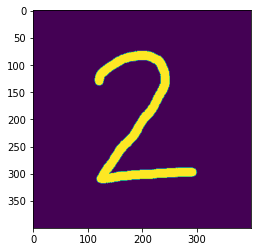

In [ ]:
plt.imshow(x)

In [ ]:
result = net.predict(x)
print("PREDICTION : ", result)

PREDICTION :  [2]
